In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten , Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


DATA VISUALIZATION AND PREPROCESSING

In [2]:
data = pd.read_csv("data/data.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
xtrain, ytrain, xtest, ytest = [], [], [], []
for index, row in data.iterrows():
        img = row['pixels'].split(" ")
        if row['Usage'] == 'Training':
            xtrain.append(img)
            ytrain.append(row['emotion'])
        else:
            xtest.append(img)
            ytest.append(row['emotion'])

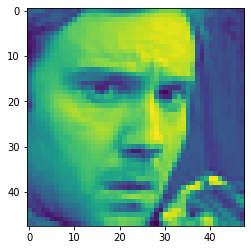

In [4]:
#List to numpy array conversion
xtrain = np.array(xtrain, dtype = 'float32')
xtest = np.array(xtest, dtype = 'float32')
ytrain = np.array(ytrain, dtype = 'float32')
ytest = np.array(ytest, dtype = 'float32')

plt.imshow(xtrain[0].reshape(48, 48))

In [5]:
#Converting to OneHotEncodings
ytrain = np_utils.to_categorical(ytrain, num_classes = 7)
ytest = np_utils.to_categorical(ytest, num_classes = 7)

In [6]:
#Standardizing data and reshaping
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)
xtrain = xtrain.reshape(xtrain.shape[0], 48, 48, 1)
xtest = xtest.reshape(xtest.shape[0], 48, 48, 1)

BUILDING MODEL

In [7]:
def model():
    model = Sequential()
    
    #1st convolution layer
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = xtrain.shape[1:], kernel_regularizer= regularizers.l2(0.001)))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    
    #2nd convolution layer
    model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
    model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.6))
    
    #3rd convolution layer
    model.add(Conv2D(7, kernel_size = (1, 1), activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
    model.add(Conv2D(7, kernel_size = (4, 4), activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    
    #Fully connected layers
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))
    
    model.summary()
    
    return model

In [8]:
model = model()
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)      